In [1]:
import os
os.chdir('..')

In [2]:
path = os.getcwd()
print(path)

C:\Users\SAMSUNG\Documents\dacon\Dacon_dota


In [3]:
import numpy as np
import pandas as pd

import os #
import cv2 #이미지 안에서 원하는 이미지 인식
from glob import glob #동일한 형식을 갖춘 데이터를 불러오는 패키지 
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
train_images = sorted(glob('data/rawdata/train/images/*'))
train_jsons = sorted(glob('data/rawdata/train/json/*'))
test_images = sorted(glob('data/rawdata/test/images/*'))
len(train_images), len(train_jsons), len(test_images)

(800, 800, 100)

In [5]:
train_meta = []
for j in train_jsons:
    json_obj = json.load(open(j))
    for f in json_obj['features']:
        geo_coord = f['geometry']['coordinates']
        geo_type = f['geometry']['type']
        object_imcoords = f['properties']['object_imcoords']
        object_angle = f['properties']['object_angle']
        building_imcoords = f['properties']['building_imcoords']
        road_imcoords = f['properties']['road_imcoords']
        image_id = f['properties']['image_id']
        ingest_time = f['properties']['ingest_time']
        type_id = f['properties']['type_id']
        type_name = f['properties']['type_name']
        train_meta.append([image_id, type_id, type_name, geo_coord, geo_type, object_angle,
                           object_imcoords, building_imcoords, road_imcoords, ingest_time])

In [6]:
train = pd.DataFrame(train_meta,columns= ['image_id','type_id','type_name','geo_coord','geo_type','object_angle',
                                   'object_imcoords','building_imcoords','road_imcoords','ingest_time'])

In [7]:
train.head()

,image_id,type_id,type_name,geo_coord,geo_type,object_angle,object_imcoords,building_imcoords,road_imcoords,ingest_time
0,OBJ00013_PS3_K3_NIA0078.png,3,civilian aircraft,"[[[1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0], [1, 1...",Polygon,6.283185,"469.1820926230315,473.2955533775398,561.654399...",EMPTY,EMPTY,2020-09-18T06:24:22.933603Z
1,OBJ00013_PS3_K3_NIA0078.png,5,small car,"[[[1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0], [1, 1...",Polygon,3.547254,"993.6889260747658,339.4410959499382,988.810925...",EMPTY,EMPTY,2020-09-18T06:24:22.933603Z
2,OBJ00013_PS3_K3_NIA0078.png,5,small car,"[[[1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0], [1, 1...",Polygon,3.647914,"988.7026551987746,331.54721860229455,984.09007...",EMPTY,EMPTY,2020-09-18T06:24:22.933603Z
3,OBJ00013_PS3_K3_NIA0078.png,5,small car,"[[[1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0], [1, 1...",Polygon,0.607917,"935.9948592758786,141.9939151216178,940.820433...",EMPTY,EMPTY,2020-09-18T06:24:22.933603Z
4,OBJ00013_PS3_K3_NIA0078.png,5,small car,"[[[1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0], [1, 1...",Polygon,3.717766,"874.5034054854823,43.55368531817367,869.677894...",EMPTY,EMPTY,2020-09-18T06:24:22.933603Z


In [8]:
train['image_id'] = train['image_id'].apply(lambda x: x.split('.')[0])

In [9]:
train.building_imcoords.unique()

array(['EMPTY'], dtype=object)

In [10]:
train.road_imcoords.unique()

array(['EMPTY'], dtype=object)

In [11]:
train['geo_coord'].apply(lambda x: str(x)).unique()

array(['[[[1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0], [1, 1, 0.0]]]'],
      dtype=object)

In [12]:
train.geo_type.unique()

array(['Polygon'], dtype=object)

In [13]:
train = train.drop(['building_imcoords','road_imcoords','geo_coord','geo_type','ingest_time'],axis=1)

In [14]:
train.head()

,image_id,type_id,type_name,object_angle,object_imcoords
0,OBJ00013_PS3_K3_NIA0078,3,civilian aircraft,6.283185,"469.1820926230315,473.2955533775398,561.654399..."
1,OBJ00013_PS3_K3_NIA0078,5,small car,3.547254,"993.6889260747658,339.4410959499382,988.810925..."
2,OBJ00013_PS3_K3_NIA0078,5,small car,3.647914,"988.7026551987746,331.54721860229455,984.09007..."
3,OBJ00013_PS3_K3_NIA0078,5,small car,0.607917,"935.9948592758786,141.9939151216178,940.820433..."
4,OBJ00013_PS3_K3_NIA0078,5,small car,3.717766,"874.5034054854823,43.55368531817367,869.677894..."


In [15]:
path = path.replace('\\','/')
train.to_csv(path+'/data/data.csv')

In [16]:
print('카테고리 종류 : ',train['type_name'].unique())
print('카테고리 수 : ', train['type_name'].nunique())

카테고리 종류 :  ['civilian aircraft' 'small car' 'truck' 'large ship' 'small ship' 'bus'
 'oil tank' 'crane' 'roundabout' 'train' 'bridge' 'military aircraft'
 'etc' 'helipad' 'athletic field' 'dam']
카테고리 수 :  16


In [17]:
df = pd.crosstab(train['image_id'], train['type_name'])
df = df.join(train.image_id.value_counts()).rename(columns={'image_id':'obj_count'})
df = df.join(train[['image_id','type_name']].drop_duplicates()['image_id'].value_counts()).rename(columns={'image_id':'obj_unique'})

In [18]:
df.head()

,athletic field,bridge,bus,civilian aircraft,crane,dam,etc,helipad,large ship,military aircraft,oil tank,roundabout,small car,small ship,train,truck,obj_count,obj_unique
image_id,,,,,,,,,,,,,,,,,,
OBJ00013_PS3_K3_NIA0078,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,7,14,3
OBJ00022_PS3_K3_NIA0078,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,3,3
OBJ00028_PS3_K3_NIA0078,0,0,0,0,4,0,0,0,2,0,4,0,180,2,0,65,257,6
OBJ00113_PS3_K3_NIA0080,0,0,9,0,0,0,0,0,0,0,0,0,164,0,0,43,216,3
OBJ00261_PS3_K3_NIA0081,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,1,5,3


In [19]:
train.type_name.value_counts()

small car            86305
truck                19011
small ship           13107
train                 5123
bus                   3840
military aircraft      937
oil tank               868
etc                    853
civilian aircraft      424
large ship             306
crane                  260
helipad                135
roundabout             131
bridge                  93
athletic field          40
dam                      3
Name: type_name, dtype: int64

- 데이터 불균형 문제를 어떻게 처리할 것인가? dam 같은 경우에는 3개 밖에 없어서 해당 test set이 들어오면 잘 처리하지 못할 것이다

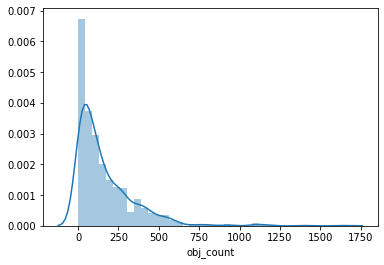

In [20]:
sns.distplot(df['obj_count'])

In [21]:
df['obj_count'].max()

1637

In [22]:
df[df['obj_count']>1000]

,athletic field,bridge,bus,civilian aircraft,crane,dam,etc,helipad,large ship,military aircraft,oil tank,roundabout,small car,small ship,train,truck,obj_count,obj_unique
image_id,,,,,,,,,,,,,,,,,,
OBJ03758_PS3_K3A_NIA0157,0,0,1,0,0,0,9,0,0,0,0,0,1530,0,0,97,1637,4
OBJ03789_PS3_K3A_NIA0158,0,0,1,0,0,0,0,0,0,0,0,0,493,658,0,8,1160,4
OBJ04053_PS3_K3A_NIA0170,0,0,13,0,0,0,0,0,0,0,0,0,1397,0,0,1,1411,3
OBJ04096_PS3_K3A_NIA0174,0,0,1,2,0,0,8,0,0,0,0,0,1157,0,0,2,1170,5
OBJ04814_PS3_K3A_NIA0315,0,0,5,0,0,0,3,0,0,0,0,0,591,11,0,488,1098,5
OBJ05425_PS3_K3A_NIA0349,0,0,0,0,0,0,0,0,0,0,0,2,1098,0,0,9,1109,3
OBJ05666_PS3_K3A_NIA0360,0,0,2,0,0,0,0,0,0,0,0,0,1092,0,0,0,1094,2


한 이미지에 나타나는 객체 수가 1000개가 넘는 경우는 7건.. 대부분 자동차나 트럭이다

In [23]:
df.obj_unique.max()

8

한 이미지에 나타나는 최대 객체 종류는 8

In [24]:
train.head(1)

,image_id,type_id,type_name,object_angle,object_imcoords
0,OBJ00013_PS3_K3_NIA0078,3,civilian aircraft,6.283185,"469.1820926230315,473.2955533775398,561.654399..."


In [25]:
for i in range(0,8,2):
    train['x'+str(int(i/2+1))] = train.object_imcoords.apply(lambda x: x.split(',')[i])

In [26]:
for i in range(1,9,2):
    train['y'+str(int((i+1)/2))] = train.object_imcoords.apply(lambda x: x.split(',')[i])

In [27]:
train.head()

,image_id,type_id,type_name,object_angle,object_imcoords,x1,x2,x3,x4,y1,y2,y3,y4
0,OBJ00013_PS3_K3_NIA0078,3,civilian aircraft,6.283185,"469.1820926230315,473.2955533775398,561.654399...",469.1820926230315,561.6543996724264,561.6543996724264,469.1820926230315,473.2955533775398,473.2955533775399,563.5489576573916,563.5489576573916
1,OBJ00013_PS3_K3_NIA0078,5,small car,3.547254,"993.6889260747658,339.4410959499382,988.810925...",993.6889260747658,988.8109258625097,985.2668417005333,990.1448419127894,339.4410959499382,341.53611374679735,333.28413454151706,331.1891167446579
2,OBJ00013_PS3_K3_NIA0078,5,small car,3.647914,"988.7026551987746,331.54721860229455,984.09007...",988.7026551987746,984.0900765284824,980.882807627531,985.4953862978231,331.54721860229455,334.1050737794211,328.32140773972,325.7635525625934
3,OBJ00013_PS3_K3_NIA0078,5,small car,0.607917,"935.9948592758786,141.9939151216178,940.820433...",935.9948592758786,940.820433867284,945.1506126791966,940.3250380877912,141.9939151216178,138.6361681558302,144.85926985584334,148.21701682163092
4,OBJ00013_PS3_K3_NIA0078,5,small car,3.717766,"874.5034054854823,43.55368531817367,869.677894...",874.5034054854823,869.6778945965918,865.5600534784157,870.3855643673062,43.55368531817367,46.688879196422135,40.35093394450673,37.21574006625826


-좌표를 x1,x4 y1,y4로 각각 나누어서 새로운 column을 생성

In [28]:
imcoords_columns = []
imcoords_columns = train.columns[-8:-1]

In [29]:
type_id = train.type_id.drop_duplicates().sort_values().to_dict().values()
type_colors = dict(zip(type_id, plt.cm.tab20.colors))

In [30]:
'''
def show_n_mask(image_id, obj_type=None, gray_mode=True):
    fig= plt.figure(figsize=(18,18))
    # plot image
    img = cv2.imread('train/images/'+image_id+'.png', cv2.COLOR_BGR2RGB)
    if gray_mode:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')
    else:
        plt.imshow(img)
    
    # All object or selected objects(obj_type)
    for idx, row in train[train.image_id == image_id][['type_id','type_name']+imcoords_columns].iterrows():
        if (obj_type==row.type_name):
            coords = list(row[imcoords_columns].values) + list(row[imcoords_columns].values[:2])
            plt.fill(coords[::2],coords[1::2], facecolor=type_colors[row.type_id], edgecolor=type_colors[row.type_id], linewidth=2, alpha=0.5)
            # Label 'type_id' 1~16
            cx = row[imcoords_columns].values[::2].mean()
            cy = row[imcoords_columns].values[1::2].mean()
            plt.text(cx,cy, str(row.type_id), color='white', fontsize=12, fontweight='semibold')
        elif obj_type == None:
            coords = list(row[imcoords_columns].values) + list(row[imcoords_columns].values[:2])
            plt.fill(coords[::2],coords[1::2], facecolor=type_colors[row.type_id], edgecolor=type_colors[row.type_id], linewidth=2, alpha=0.5)
            # Label 'type_id' 1~16
            cx = row[imcoords_columns].values[::2].mean()
            cy = row[imcoords_columns].values[1::2].mean()
            plt.text(cx,cy, str(row.type_id), color='white', fontsize=12, fontweight='semibold')
'''

"\ndef show_n_mask(image_id, obj_type=None, gray_mode=True):\n    fig= plt.figure(figsize=(18,18))\n    # plot image\n    img = cv2.imread('train/images/'+image_id+'.png', cv2.COLOR_BGR2RGB)\n    if gray_mode:\n        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')\n    else:\n        plt.imshow(img)\n    \n    # All object or selected objects(obj_type)\n    for idx, row in train[train.image_id == image_id][['type_id','type_name']+imcoords_columns].iterrows():\n        if (obj_type==row.type_name):\n            coords = list(row[imcoords_columns].values) + list(row[imcoords_columns].values[:2])\n            plt.fill(coords[::2],coords[1::2], facecolor=type_colors[row.type_id], edgecolor=type_colors[row.type_id], linewidth=2, alpha=0.5)\n            # Label 'type_id' 1~16\n            cx = row[imcoords_columns].values[::2].mean()\n            cy = row[imcoords_columns].values[1::2].mean()\n            plt.text(cx,cy, str(row.type_id), color='white', fontsize=12, fontweig